**Time Series Forcasting** is based on Time Series Data that is recorded at intervals, so the main idea is based on the time series data we can predict what can happen in the future based on the occurences and trends in previous periods. Facebook Prophet is perfect application for this type of crime as more seasonal data is required

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet

Pandas: Data-Frame Manipulations,
Numpy: Numerical Analysis

In [ ]:
chicago_df_1 = pd.read_csv('/content/drive/MyDrive/Chicago Crime Rate/Chicago_Crimes_2005_to_2007.csv',error_bad_lines=False)
chicago_df_2 = pd.read_csv('/content/drive/MyDrive/Chicago Crime Rate/Chicago_Crimes_2008_to_2011.csv', error_bad_lines=False)
chicago_df_3 = pd.read_csv('/content/drive/MyDrive/Chicago Crime Rate/Chicago_Crimes_2012_to_2017.csv', error_bad_lines=False)

b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [ ]:
print(chicago_df_1.shape)
print(chicago_df_2.shape)
print(chicago_df_3.shape)

(1872343, 23)
(2688710, 23)
(1456714, 23)


The Data Concatenation into one for the prophet model to predict

In [ ]:
chicago_df = pd.concat([chicago_df_1, chicago_df_2, chicago_df_3])

In [ ]:
chicago_df.shape

(6017767, 23)

Whenever, you see a .head extension to the data it means some amount of the data is going to be shown.

In [ ]:
chicago_df.head(20)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1622,16.0,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False,321,3.0,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False,321,3.0,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,False,1633,16.0,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False,822,8.0,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"
5,6,4673631,HM263167,03/30/2006 10:30:00 PM,014XX W 73RD PL,0560,ASSAULT,SIMPLE,APARTMENT,True,False,734,7.0,17.0,67.0,08A,1167688.0,1855998.0,2006,04/15/2016 08:55:02 AM,41.760401,-87.660982,"(41.760401372, -87.660982392)"
6,7,4673632,HM273234,04/05/2006 12:10:00 PM,050XX N LARAMIE AVE,0460,BATTERY,SIMPLE,"SCHOOL, PUBLIC, BUILDING",True,False,1623,16.0,45.0,11.0,08B,1140791.0,1932993.0,2006,04/15/2016 08:55:02 AM,41.972221,-87.757670,"(41.972220564, -87.75766982)"
7,8,4673633,HM275105,04/05/2006 03:00:00 PM,067XX S ROCKWELL ST,0820,THEFT,$500 AND UNDER,STREET,False,False,832,8.0,15.0,66.0,06,1160205.0,1859776.0,2006,04/15/2016 08:55:02 AM,41.770926,-87.688304,"(41.770925978, -87.688304107)"
8,9,4673634,HM275063,04/05/2006 09:30:00 PM,019XX W CHICAGO AVE,0560,ASSAULT,SIMPLE,PARKING LOT/GARAGE(NON.RESID.),False,False,1322,12.0,32.0,24.0,08A,1163122.0,1905349.0,2006,04/15/2016 08:55:02 AM,41.895923,-87.676334,"(41.895922672, -87.676333733)"
9,10,4673635,HM268513,04/03/2006 03:00:00 AM,063XX S EBERHART AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,312,3.0,20.0,42.0,08B,1180669.0,1863047.0,2006,04/15/2016 08:55:02 AM,41.779456,-87.613191,"(41.77945628, -87.613190628)"


Sns 'heatmap' basically shows the map of the corresponding data, the trend the whole map.

In [ ]:
# plt.figure(figsize=(10,10))
# sns.heatmap(chicago_df.isnull(), cbar = False, cmap ='YlGnBu')

In [ ]:
chicago_df.drop(['Unnamed: 0', 'Case Number', 'ID', 'IUCR', 'X Coordinate', 'Y Coordinate', 'Updated On', 'Year', 'FBI Code', 'Beat', 'Ward', 'Community Area','District','Location','Latitude','Longitude'], axis=1)

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,04/02/2006 01:00:00 PM,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
1,02/26/2006 01:40:48 PM,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2,01/08/2006 11:16:00 PM,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
3,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
4,02/17/2006 09:03:14 PM,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False
...,...,...,...,...,...,...,...
1456709,05/03/2016 11:33:00 PM,026XX W 23RD PL,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True
1456710,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True
1456711,05/03/2016 12:15:00 AM,024XX W 63RD ST,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False
1456712,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True


In [ ]:
chicago_df.Date = pd.to_datetime(chicago_df.Date, format ='%m/%d/%Y %I:%M:%S %p')

In [ ]:
chicago_df.index = pd.DatetimeIndex(chicago_df.Date)

In [ ]:
chicago_df.index

DatetimeIndex(['2006-04-02 13:00:00', '2006-02-26 13:40:48',
               '2006-01-08 23:16:00', '2006-04-05 18:45:00',
               '2006-02-17 21:03:14', '2006-03-30 22:30:00',
               '2006-04-05 12:10:00', '2006-04-05 15:00:00',
               '2006-04-05 21:30:00', '2006-04-03 03:00:00',
               ...
               '2016-05-03 23:30:00', '2016-05-03 23:50:00',
               '2016-05-03 22:25:00', '2016-05-03 23:00:00',
               '2016-05-03 23:28:00', '2016-05-03 23:33:00',
               '2016-05-03 23:30:00', '2016-05-03 00:15:00',
               '2016-05-03 21:07:00', '2016-05-03 23:38:00'],
              dtype='datetime64[ns]', name='Date', length=6017767, freq=None)

In [ ]:
chicago_df.Date

Date
2006-04-02 13:00:00   2006-04-02 13:00:00
2006-02-26 13:40:48   2006-02-26 13:40:48
2006-01-08 23:16:00   2006-01-08 23:16:00
2006-04-05 18:45:00   2006-04-05 18:45:00
2006-02-17 21:03:14   2006-02-17 21:03:14
                              ...        
2016-05-03 23:33:00   2016-05-03 23:33:00
2016-05-03 23:30:00   2016-05-03 23:30:00
2016-05-03 00:15:00   2016-05-03 00:15:00
2016-05-03 21:07:00   2016-05-03 21:07:00
2016-05-03 23:38:00   2016-05-03 23:38:00
Name: Date, Length: 6017767, dtype: datetime64[ns]

In [ ]:
chicago_df

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,,,
2006-04-02 13:00:00,0,4673626,HM274058,2006-04-02 13:00:00,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1622,16.0,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
2006-02-26 13:40:48,1,4673627,HM202199,2006-02-26 13:40:48,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False,321,3.0,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2006-01-08 23:16:00,2,4673628,HM113861,2006-01-08 23:16:00,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False,321,3.0,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
2006-04-05 18:45:00,4,4673629,HM274049,2006-04-05 18:45:00,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,False,1633,16.0,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
2006-02-17 21:03:14,5,4673630,HM187120,2006-02-17 21:03:14,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False,822,8.0,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-03 23:33:00,6250330,10508679,HZ250507,2016-05-03 23:33:00,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1034,10.0,28.0,30.0,08B,1159105.0,1888300.0,2016,05/10/2016 03:56:50 PM,41.849222,-87.691556,"(41.849222028, -87.69155551)"
2016-05-03 23:30:00,6251089,10508680,HZ250491,2016-05-03 23:30:00,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True,731,7.0,17.0,69.0,14,1175230.0,1856183.0,2016,05/10/2016 03:56:50 PM,41.760744,-87.633335,"(41.760743949, -87.63333531)"
2016-05-03 00:15:00,6251349,10508681,HZ250479,2016-05-03 00:15:00,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False,825,8.0,15.0,66.0,04B,1161027.0,1862810.0,2016,05/10/2016 03:56:50 PM,41.779235,-87.685207,"(41.779234743, -87.685207125)"


In [ ]:
chicago_df['Primary Type'].value_counts()

THEFT                                1245111
BATTERY                              1079178
CRIMINAL DAMAGE                       702702
NARCOTICS                             674831
BURGLARY                              369056
OTHER OFFENSE                         368169
ASSAULT                               360244
MOTOR VEHICLE THEFT                   271624
ROBBERY                               229467
DECEPTIVE PRACTICE                    225180
CRIMINAL TRESPASS                     171596
PROSTITUTION                           60735
WEAPONS VIOLATION                      60335
PUBLIC PEACE VIOLATION                 48403
OFFENSE INVOLVING CHILDREN             40260
CRIM SEXUAL ASSAULT                    22789
SEX OFFENSE                            20172
GAMBLING                               14755
INTERFERENCE WITH PUBLIC OFFICER       14009
LIQUOR LAW VIOLATION                   12129
ARSON                                   9269
HOMICIDE                                5879
KIDNAPPING

In [ ]:
order_data = chicago_df['Primary Type'].value_counts().iloc[:15].index

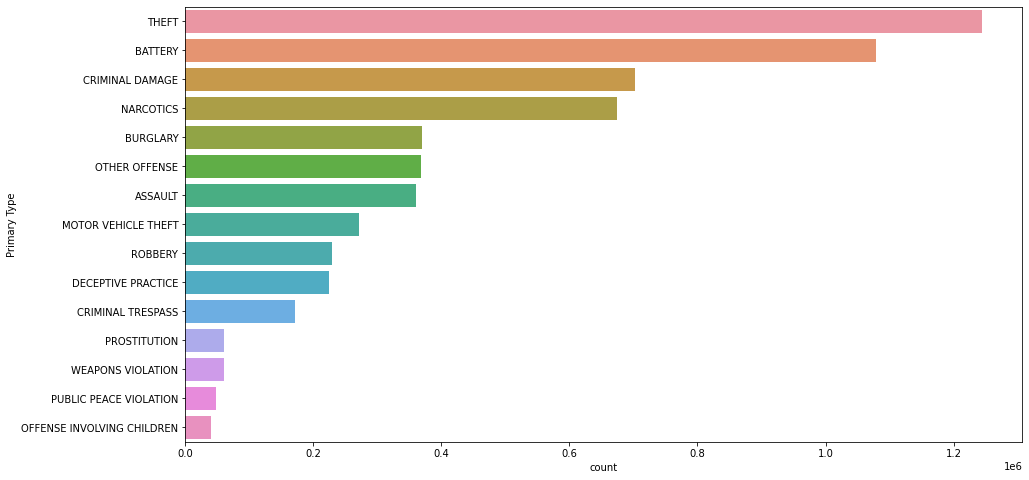

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(y='Primary Type', data = chicago_df, order = order_data )

Index(['STREET', 'RESIDENCE', 'SIDEWALK', 'APARTMENT', 'OTHER',
       'PARKING LOT/GARAGE(NON.RESID.)', 'ALLEY', 'SCHOOL, PUBLIC, BUILDING',
       'RESIDENCE-GARAGE', 'VEHICLE NON-COMMERCIAL', 'RESIDENCE PORCH/HALLWAY',
       'SMALL RETAIL STORE', 'RESTAURANT', 'DEPARTMENT STORE',
       'RESIDENTIAL YARD (FRONT/BACK)'],
      dtype='object')


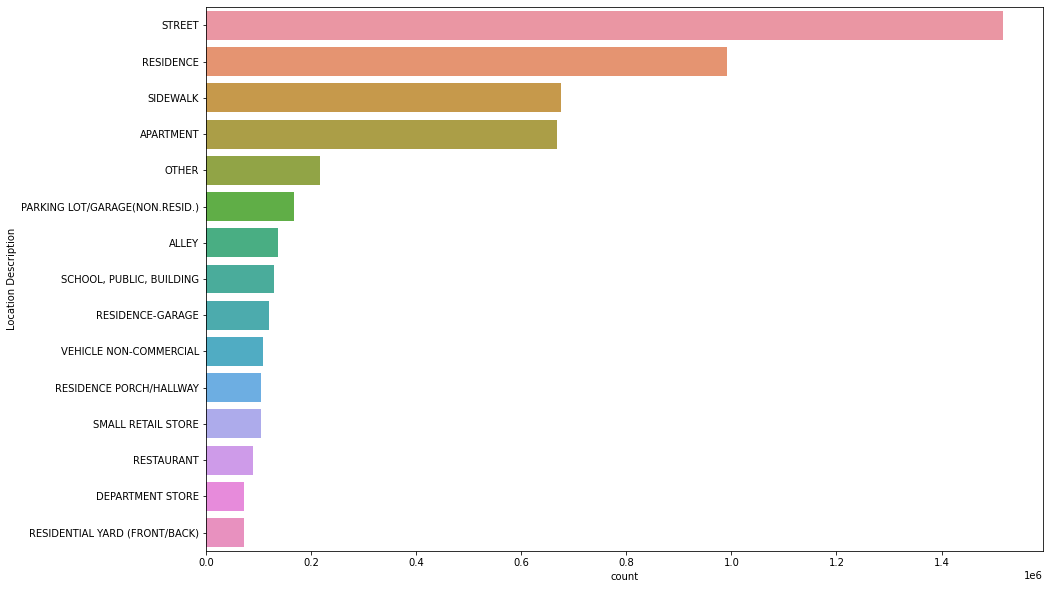

In [ ]:
plt.figure(figsize=(15,10))
order_data = chicago_df['Location Description'].value_counts().iloc[:15].index
print(order_data)
sns.countplot(y='Location Description',data= chicago_df,order = order_data ) 

In [ ]:
chicago_df.resample('Y').size()

Date
2005-12-31    455811
2006-12-31    794684
2007-12-31    621848
2008-12-31    852053
2009-12-31    783900
2010-12-31    700691
2011-12-31    352066
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'Number Of Crimes')

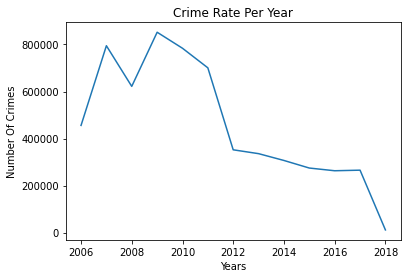

In [ ]:
plt.plot(chicago_df.resample('Y').size())
plt.title('Crime Rate Per Year')
plt.xlabel('Years')
plt.ylabel('Number Of Crimes')

In [ ]:
chicago_prophet = chicago_df.resample('M').size().reset_index()
chicago_prophet.columns=['ds', 'y']
# chicago_prophet = chicago_prophet.rename(columns = {'Date':'ds','0': 'y'})

In [ ]:
chicago_prophet

,ds,y
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


In [ ]:
m = Prophet()
m.fit(chicago_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=720)
forecast = m.predict(future)

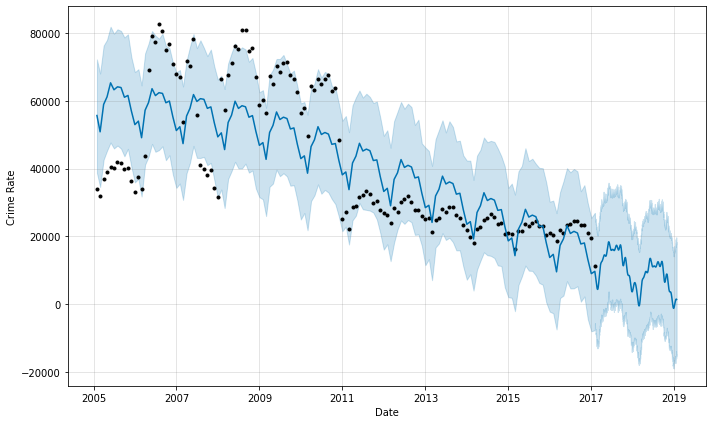

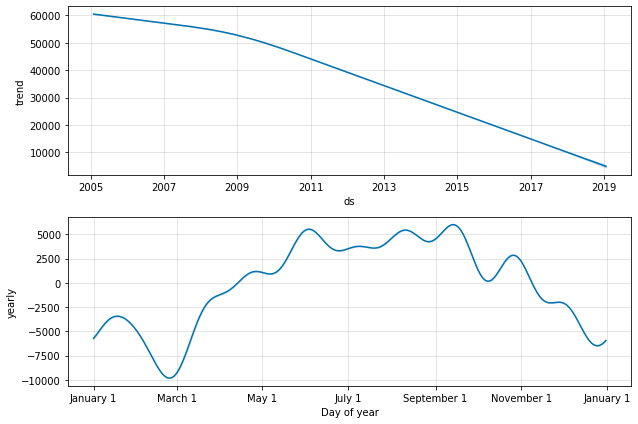

In [ ]:
figure = m.plot(forecast, xlabel = 'Date', ylabel = 'Crime Rate')
figure = m.plot_components(forecast)